<a href="https://colab.research.google.com/github/venkatvivek06/twitter_analysis/blob/main/Group_5_Code_ADBMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=fd9c0a9cbc0f9cc805be780fff51b127c35082cc4fe33334c493b53d373bc008
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [3]:
from pyspark.sql import functions as func
from pyspark.sql.types import StringType,FloatType

In [14]:
from google.colab import files
 
 
uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [15]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Twitter').getOrCreate()
spark

In [16]:
df = spark.read.csv("training.1600000.processed.noemoticon.csv", inferSchema=True)

In [17]:
print( df.head(5))

[Row(_c0=0, _c1=1467810369, _c2='Mon Apr 06 22:19:45 PDT 2009', _c3='NO_QUERY', _c4='_TheSpecialOne_', _c5="@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"), Row(_c0=0, _c1=1467810672, _c2='Mon Apr 06 22:19:49 PDT 2009', _c3='NO_QUERY', _c4='scotthamilton', _c5="is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"), Row(_c0=0, _c1=1467810917, _c2='Mon Apr 06 22:19:53 PDT 2009', _c3='NO_QUERY', _c4='mattycus', _c5='@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'), Row(_c0=0, _c1=1467811184, _c2='Mon Apr 06 22:19:57 PDT 2009', _c3='NO_QUERY', _c4='ElleCTF', _c5='my whole body feels itchy and like its on fire '), Row(_c0=0, _c1=1467811193, _c2='Mon Apr 06 22:19:57 PDT 2009', _c3='NO_QUERY', _c4='Karoli', _c5="@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

In [18]:
df.show()

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       _c1|                 _c2|     _c3|            _c4|                 _c5|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|  0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|  0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|  0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|  0|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nop

In [20]:
df.describe()

DataFrame[summary: string, _c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string]

In [21]:
df = df.withColumnRenamed('_c0','target').withColumnRenamed('_c1','id').withColumnRenamed('_c2','date')\
  .withColumnRenamed('_c3','flag').withColumnRenamed('_c4','user').withColumnRenamed('_c5','text')
df.show()

+------+----------+--------------------+--------+---------------+--------------------+
|target|        id|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|     0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|     0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|     0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|     0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|     0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|     0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|     0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|     0|1467811795|Mon Apr 06 22:20:...|NO_

In [22]:
df.tail(5)

[Row(target=4, id=2193601966, date='Tue Jun 16 08:40:49 PDT 2009', flag='NO_QUERY', user='AmandaMarie1028', text='Just woke up. Having no school is the best feeling ever '),
 Row(target=4, id=2193601969, date='Tue Jun 16 08:40:49 PDT 2009', flag='NO_QUERY', user='TheWDBoards', text='TheWDB.com - Very cool to hear old Walt interviews!  ♫ http://blip.fm/~8bmta'),
 Row(target=4, id=2193601991, date='Tue Jun 16 08:40:49 PDT 2009', flag='NO_QUERY', user='bpbabe', text='Are you ready for your MoJo Makeover? Ask me for details '),
 Row(target=4, id=2193602064, date='Tue Jun 16 08:40:49 PDT 2009', flag='NO_QUERY', user='tinydiamondz', text='Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur '),
 Row(target=4, id=2193602129, date='Tue Jun 16 08:40:50 PDT 2009', flag='NO_QUERY', user='RyanTrevMorris', text='happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H ')]

In [23]:
print(f"{df.count()} rows and  {len(df.columns)} columns")

1600000 rows and  6 columns


In [24]:
df.printSchema()

root
 |-- target: integer (nullable = true)
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



In [25]:
df = df.dropDuplicates()

In [26]:
df.dtypes

[('target', 'int'),
 ('id', 'bigint'),
 ('date', 'string'),
 ('flag', 'string'),
 ('user', 'string'),
 ('text', 'string')]

In [27]:
df.show(6, truncate = False)

+------+----------+----------------------------+--------+---------+----------------------------------------------------------------------------------------------------------------------------+
|target|id        |date                        |flag    |user     |text                                                                                                                        |
+------+----------+----------------------------+--------+---------+----------------------------------------------------------------------------------------------------------------------------+
|0     |1467949746|Mon Apr 06 22:57:28 PDT 2009|NO_QUERY|xShyGirlx|At work                                                                                                                     |
|0     |1468036770|Mon Apr 06 23:22:50 PDT 2009|NO_QUERY|imcute519|@astewart87 oh my gosh that made me emotional haha idk why!!! i dont want to get old                                        |
|0     |1468068604|Mon Apr 06 23:32

In [28]:
df.select("target").distinct().show()

+------+
|target|
+------+
|     4|
|     0|
+------+



In [29]:
df.createOrReplaceTempView('temp')
df = spark.sql('SELECT CASE target WHEN 4 THEN 1.0  ELSE 0 END AS label, text FROM temp')
df.show(5, truncate = False)

+-----+----------------------------------------------------------------------------------------------------------------------------+
|label|text                                                                                                                        |
+-----+----------------------------------------------------------------------------------------------------------------------------+
|0.0  |At work                                                                                                                     |
|0.0  |@astewart87 oh my gosh that made me emotional haha idk why!!! i dont want to get old                                        |
|0.0  |i need new glasses...mines is hangnon 1 arm                                                                                 |
|0.0  |Getting changed in the hopes that, that means we can go to the store now!  Poor cat is out of food...oops.                  |
|0.0  |really now, time for sleep. dreaming of my city, more tattoos,

In [30]:
df.head(5)

[Row(label=Decimal('0.0'), text='At work '),
 Row(label=Decimal('0.0'), text='@astewart87 oh my gosh that made me emotional haha idk why!!! i dont want to get old '),
 Row(label=Decimal('0.0'), text='i need new glasses...mines is hangnon 1 arm '),
 Row(label=Decimal('0.0'), text='Getting changed in the hopes that, that means we can go to the store now!  Poor cat is out of food...oops. '),
 Row(label=Decimal('0.0'), text='really now, time for sleep. dreaming of my city, more tattoos, and other great things. waking up to early morning sociology ')]

In [31]:
df.groupBy("label").count().show()

+-----+------+
|label| count|
+-----+------+
|  0.0|800000|
|  1.0|800000|
+-----+------+



In [32]:
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re

In [33]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [37]:
clean_text = func.udf(lambda x: preprocess(x), StringType())
df = df.withColumn('text_cleaned',clean_text(func.col("text")))

In [38]:
df.tail(5)

[Row(label=Decimal('1.0'), text='Installing office to my little netbook, going to do some work at a friends house in a short while. ', text_cleaned='installing office little netbook going work friends house short'),
 Row(label=Decimal('1.0'), text='man.. Ab got work.. ahhh!!! but later imma shop till i drop!! ', text_cleaned='man ab got work ahhh later imma shop till drop'),
 Row(label=Decimal('1.0'), text="@paupaula I'm joining The SPectrum maybe. Idk... But yeah I'm dedicating myself to my studies too  How? Idk.", text_cleaned='joining spectrum maybe idk yeah dedicating studies idk'),
 Row(label=Decimal('1.0'), text='Friend over  My god! 300th Update!!', text_cleaned='friend god 300th update'),
 Row(label=Decimal('1.0'), text='TIME MAG ONLINE is very interesting. Watching videos this morning. Enjoying free content... while it lasts. ', text_cleaned='time mag online interesting watching videos morning enjoying free content lasts')]

In [39]:
from wordcloud import WordCloud
pandas_df = df.toPandas()
pandas_df.head()

,label,text,text_cleaned
0,0.0,At work,work
1,0.0,@astewart87 oh my gosh that made me emotional ...,oh gosh made emotional haha idk dont want get old
2,0.0,i need new glasses...mines is hangnon 1 arm,need new glasses mines hangnon 1 arm
3,0.0,"Getting changed in the hopes that, that means ...",getting changed hopes means go store poor cat ...
4,0.0,"really now, time for sleep. dreaming of my cit...",really time sleep dreaming city tattoos great ...


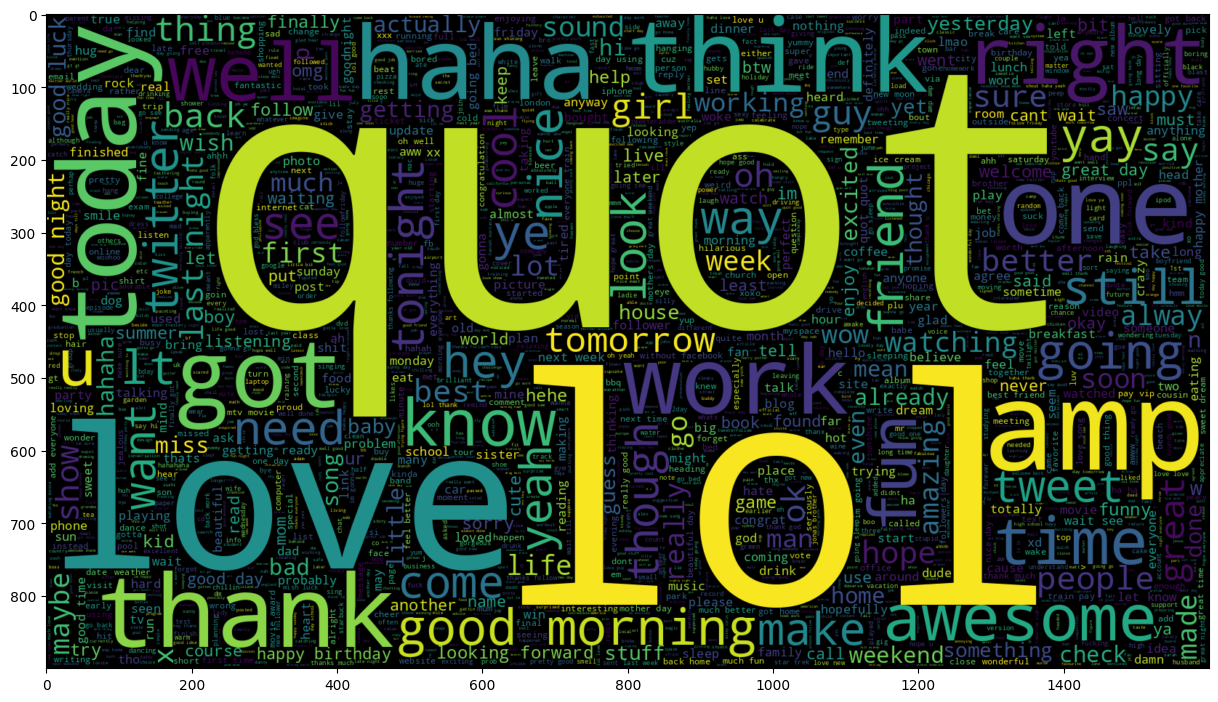

In [40]:
plt.figure(figsize = (15,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 900).generate(" ".join(pandas_df[pandas_df["label"]==1.0].text_cleaned))
plt.imshow(wc , interpolation = 'bilinear')

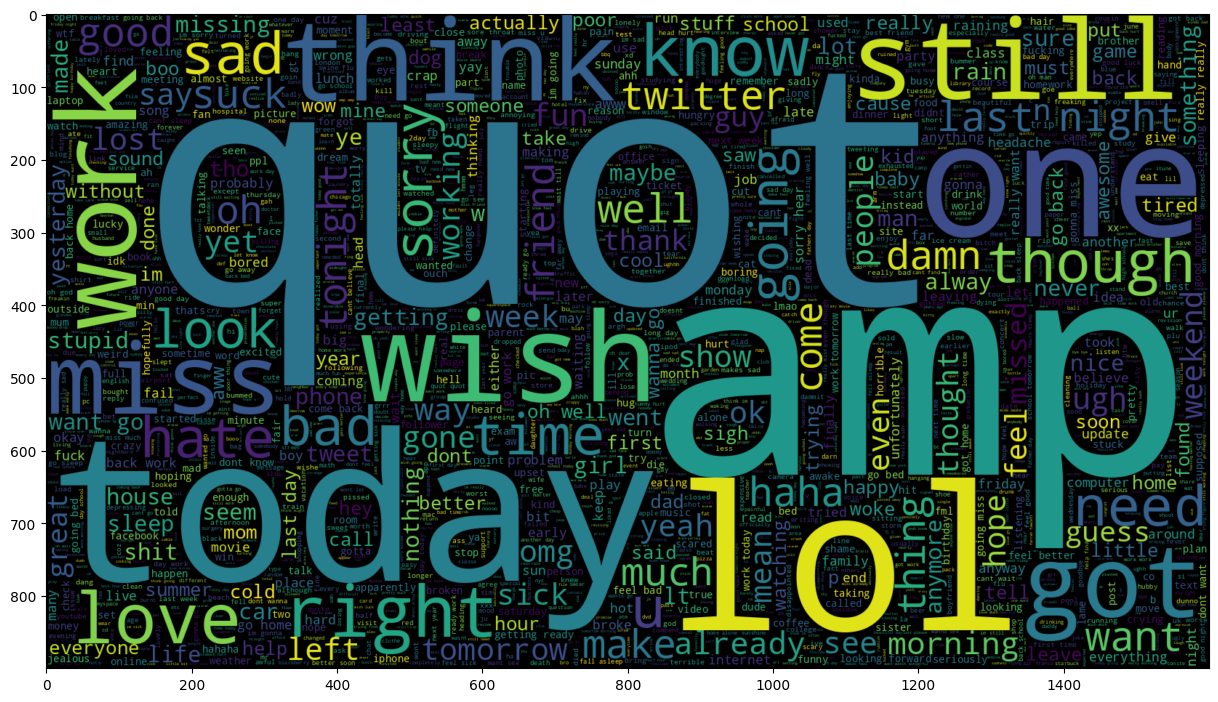

In [41]:
plt.figure(figsize = (15,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 900).generate(" ".join(pandas_df[pandas_df["label"]==0.0].text_cleaned))
plt.imshow(wc , interpolation = 'bilinear')

In [42]:
from pyspark.ml.feature import Tokenizer

In [43]:
tokenizer = Tokenizer(inputCol="text_cleaned", outputCol="words_tokens")
words_tokens = tokenizer.transform(df)
words_tokens.show()

+-----+--------------------+--------------------+--------------------+
|label|                text|        text_cleaned|        words_tokens|
+-----+--------------------+--------------------+--------------------+
|  0.0|            At work |                work|              [work]|
|  0.0|@astewart87 oh my...|oh gosh made emot...|[oh, gosh, made, ...|
|  0.0|i need new glasse...|need new glasses ...|[need, new, glass...|
|  0.0|Getting changed i...|getting changed h...|[getting, changed...|
|  0.0|really now, time ...|really time sleep...|[really, time, sl...|
|  0.0|pfff i want to go...|pfff want go back...|[pfff, want, go, ...|
|  0.0|Currently watchin...|currently watchin...|[currently, watch...|
|  0.0|What a bad day! N...|bad day need comf...|[bad, day, need, ...|
|  0.0|Tried to install ...|tried install twi...|[tried, install, ...|
|  0.0|Having casual, un...|casual unprotecte...|[casual, unprotec...|
|  0.0|Good morning worl...|good morning worl...|[good, morning, w...|
|  0.0

In [44]:
from pyspark.ml.feature import CountVectorizer

In [45]:
count = CountVectorizer (inputCol="words_tokens", outputCol="rawFeatures")
model = count.fit(words_tokens)
featurizedData = model.transform(words_tokens)
featurizedData.show()

+-----+--------------------+--------------------+--------------------+--------------------+
|label|                text|        text_cleaned|        words_tokens|         rawFeatures|
+-----+--------------------+--------------------+--------------------+--------------------+
|  0.0|            At work |                work|              [work]|  (262144,[7],[1.0])|
|  0.0|@astewart87 oh my...|oh gosh made emot...|[oh, gosh, made, ...|(262144,[2,26,30,...|
|  0.0|i need new glasse...|need new glasses ...|[need, new, glass...|(262144,[25,33,10...|
|  0.0|Getting changed i...|getting changed h...|[getting, changed...|(262144,[4,56,235...|
|  0.0|really now, time ...|really time sleep...|[really, time, sl...|(262144,[12,18,35...|
|  0.0|pfff i want to go...|pfff want go back...|[pfff, want, go, ...|(262144,[4,6,13,2...|
|  0.0|Currently watchin...|currently watchin...|[currently, watch...|(262144,[5,32,61,...|
|  0.0|What a bad day! N...|bad day need comf...|[bad, day, need, ...|(262144,[1

In [46]:
from pyspark.ml.feature import IDF

In [47]:
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("label", "features").show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(262144,[7],[3.24...|
|  0.0|(262144,[2,26,30,...|
|  0.0|(262144,[25,33,10...|
|  0.0|(262144,[4,56,235...|
|  0.0|(262144,[12,18,35...|
|  0.0|(262144,[4,6,13,2...|
|  0.0|(262144,[5,32,61,...|
|  0.0|(262144,[1,33,48,...|
|  0.0|(262144,[7,39,121...|
|  0.0|(262144,[20,81,20...|
|  0.0|(262144,[0,10,35,...|
|  0.0|(262144,[24,39,40...|
|  0.0|(262144,[3,147,98...|
|  0.0|(262144,[15,49,29...|
|  0.0|(262144,[21,51,14...|
|  0.0|(262144,[8,31,78,...|
|  0.0|(262144,[66,201,3...|
|  0.0|(262144,[8,31,124...|
|  0.0|(262144,[157,256,...|
|  0.0|(262144,[176,317,...|
+-----+--------------------+
only showing top 20 rows



In [48]:
df_final = rescaledData.select("label", "features")
seed = 42 
trainDF, testDF = df_final.randomSplit([0.7,0.3],seed)

In [49]:
trainDF.show()

+-----+--------------+
|label|      features|
+-----+--------------+
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
|  0.0|(262144,[],[])|
+-----+--------------+
only showing top 20 rows



In [51]:
trainDF.groupby("label").count().show()

+-----+------+
|label| count|
+-----+------+
|  0.0|559900|
|  1.0|560418|
+-----+------+



In [52]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol = "label", featuresCol = "features",maxIter = 10)
model = lr.fit(trainDF) 

In [53]:
predictions = model.transform(testDF)
pred = predictions.toPandas()
pred.head() 

,label,features,rawPrediction,probability,prediction
0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
1,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
2,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
3,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
4,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0


In [57]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes()
model2 = nb.fit(trainDF) 

In [58]:
predictions2 = model.transform(testDF)
pred2 = predictions2.toPandas()
pred2.head() 

,label,features,rawPrediction,probability,prediction
0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
1,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
2,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
3,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0
4,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2725043664240535, 0.2725043664240535]","[0.4322923803374026, 0.5677076196625974]",1.0


In [59]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol = "label", metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)
print(f"The testing areaUnderROC of our Logistic Regression model is: {areaUnderROC}") 

The testing areaUnderROC of our Logistic Regression model is: 0.816572245938019


In [60]:
areaUnderROC2 = evaluator.evaluate(predictions2)
print(f"The testing areaUnderROC of our Naive Bayes model is: {areaUnderROC2}") 

The testing areaUnderROC of our Naive Bayes model is: 0.8165720611531138


In [61]:
y_true = pred['label'].astype('float')
y_pred = pred['prediction']

In [62]:
y_true.value_counts()

0.0    240100
1.0    239582
Name: label, dtype: int64

In [63]:
y_pred.value_counts()

1.0    247858
0.0    231824
Name: prediction, dtype: int64

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75    240100
         1.0       0.75      0.78      0.76    239582

    accuracy                           0.76    479682
   macro avg       0.76      0.76      0.76    479682
weighted avg       0.76      0.76      0.76    479682



<Axes: >

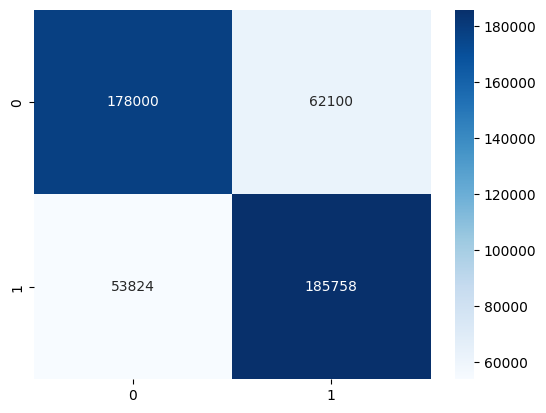

In [65]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt=  'd', cmap = 'Blues')